###  Chapter 7: Questions 4 (page 326)


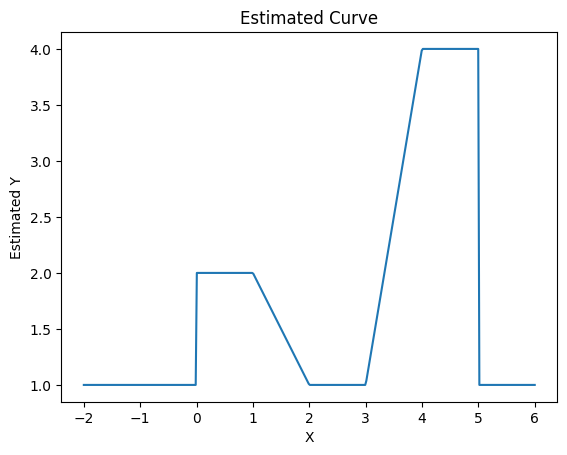

Basis function b1(x):
b1(x) = I(0 ≤ X ≤ 2) − (X − 1) I(1 ≤ X ≤ 2)
Basis function b2(x):
b2(x) = (X − 3) I(3 ≤ X ≤ 4) + I(4 < X ≤ 5)
Estimated curve equation:
Estimated Y = beta0 + beta1*b1(X) + beta2*b2(X)
Estimated Y = 1 + 1*b1(X) + 3*b2(X)
Intercept (beta0): 1
Slope for b1 (beta1): 1
Slope for b2 (beta2): 3


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients
beta0 = 1
beta1 = 1
beta2 = 3

# Basis functions
def b1(x):
    # I(0 ≤ X ≤ 2) − (X − 1) I(1 ≤ X ≤ 2)
    return ((0 <= x) & (x <= 2)).astype(float) - (x - 1) * ((1 <= x) & (x <= 2))

def b2(x):
    # (X − 3) I(3 ≤ X ≤ 4) + I(4 < X ≤ 5)
    return (x - 3) * ((3 <= x) & (x <= 4)) + ((4 < x) & (x <= 5)).astype(float)

# Generate X values
x = np.linspace(-2, 6, 400)

# Compute estimated Y
y = beta0 + beta1*b1(x) + beta2*b2(x)

# Plot
plt.figure()
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Estimated Y")
plt.title("Estimated Curve")
plt.show()


# Report the basis functions
print("Basis function b1(x):")
print("b1(x) = I(0 ≤ X ≤ 2) − (X − 1) I(1 ≤ X ≤ 2)")
print("Basis function b2(x):")
print("b2(x) = (X − 3) I(3 ≤ X ≤ 4) + I(4 < X ≤ 5)")
# Report the estimated curve equation
print("Estimated curve equation:")
print("Estimated Y = beta0 + beta1*b1(X) + beta2*b2(X)")
print("Estimated Y = 1 + 1*b1(X) + 3*b2(X)")
# Report the intercepts and slope values
print(f"Intercept (beta0): {beta0}")
print(f"Slope for b1 (beta1): {beta1}")
print(f"Slope for b2 (beta2): {beta2}")



### Chapter 8: Question 2


Boosting with depth-one trees (decision stumps) produces an additive model because each stump 
can only split on a **single** predictor variable. A depth-one tree has just one internal node, 
so it models a function of one variable at a time.

Let the boosted model after $M$ steps be:
$
\hat{f}(X) = \sum_{m=1}^M h_m(X),
$
where each $h_m$ is a fitted stump.

Since a stump uses only one predictor at a time, we can write:
$
h_m(X) = f_{j(m)}(X_{j(m)}),
$
where $j(m)$ denotes the variable used by stump $m$.

If we group all terms that depend on the same variable, we obtain:
$
\hat{f}(X) = \sum_{j=1}^p f_j(X_j).
$

This is an **additive model**: the prediction is expressed as a sum of separate functions, each 
involving only one predictor, and **no interaction terms** between variables can appear.

### Chapter 8: Question 3

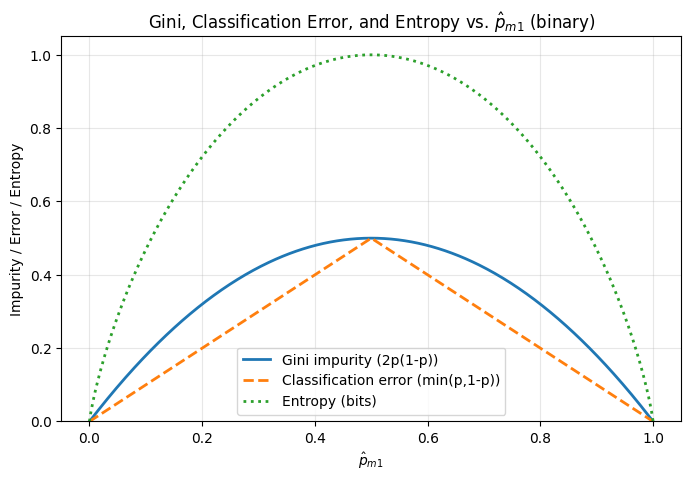

In [8]:
# Drop warnings for log(0)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Plot Gini index, classification error and entropy (two-class) as functions of \^pm1

# p = \hat{p}_{m1} ranging from 0 to 1
p = np.linspace(0, 1, 500)

# Gini impurity for binary: 2 p (1-p)
gini = 2 * p * (1 - p)

# Classification error (misclassification rate): 1 - max(p, 1-p) = min(p, 1-p)
classification_error = np.minimum(p, 1 - p)

# Entropy (bits): -p log2 p - (1-p) log2(1-p), with 0 log 0 treated as 0
entropy = -(np.where(p == 0, 0.0, p * np.log2(p)) + np.where(p == 1, 0.0, (1 - p) * np.log2(1 - p)))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p, gini, label="Gini impurity (2p(1-p))", lw=2)
plt.plot(p, classification_error, label="Classification error (min(p,1-p))", lw=2, linestyle="--")
plt.plot(p, entropy, label="Entropy (bits)", lw=2, linestyle=":")

plt.xlabel(r"$\hat{p}_{m1}$")
plt.ylabel("Impurity / Error / Entropy")
plt.title("Gini, Classification Error, and Entropy vs. $\hat{p}_{m1}$ (binary)")
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0, 1.05)
plt.show()
